In [ ]:
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [ ]:
!mkdir pan_card_tempering
!mkdir pan_card_tempering/image

In [ ]:
original = Image.open('/content/pan_card_tempering/image/origi.png')
tampered = Image.open('/content/pan_card_tempering/image/dup.png')

In [ ]:
print("Original Image format : ",original.format)
print("Tampered Image format : ",tampered.format)
print("Original Image Size: ",original.size)
print("Tampered Image Size:",tampered.size)

Original Image format :  JPEG
Tampered Image format :  JPEG
Original Image Size:  (1907, 1206)
Tampered Image Size: (2060, 1301)


In [ ]:
original = original.resize((250,160)) #resizing the original
original.save('/content/pan_card_tempering/image/original.png')
tampered = tampered.resize((250,160))#resizing the tampered
tampered.save('/content/pan_card_tempering/image/tampered.png')

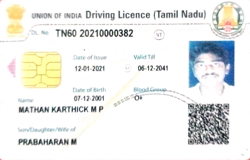

In [ ]:
original

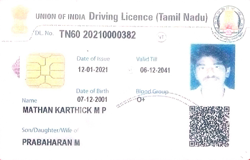

In [ ]:
tampered

In [ ]:
original = cv2.imread('/content/pan_card_tempering/image/original.png') #reads the image
tampered = cv2.imread('/content/pan_card_tempering/image/tampered.png')


In [ ]:
ogray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY) #coverting the image from color to grayscale
tgray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

In [ ]:
(score,diff) = structural_similarity(ogray,tgray,full=True)#find differences between a group of pixels
# The diff image contains the actual image differences between the two images
# and is represented as a floating point data type in the range [0,1] 
# so we must convert the array to 8-bit unsigned integers in the range
# [0,255] before we can use it with OpenCV
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.5907228866526298


In [ ]:
thresh = cv2.threshold(diff,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
# cv2.CHAIN_APPROX_SIMPLE provides these start and endpoints of bounding contours, thus resulting in much more efficient storage of contour information.
#cv2.RETR_EXTERNAL → Retrieves external or outer contours only
cnts =  .grab_contours(cnts)

In [ ]:
for c in cnts:
  (x,y,w,h) = cv2.boundingRect(c)
  cv2.rectangle(original,(x,y),(x+w,y+h),(0,0,255),2)
  cv2.rectangle(tampered,(x,y),(x+w,y+h),(0,0,255),2)

Original Format Image


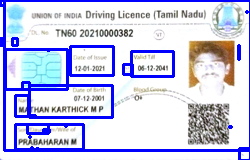

In [ ]:
print("Original Format Image")
Image.fromarray(original)

Tampered Image


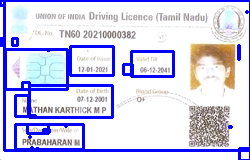

In [ ]:
print("Tampered Image")
Image.fromarray(tampered)

Different Image


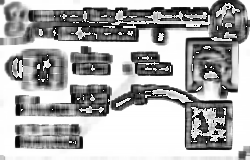

In [ ]:
print("Different Image")
Image.fromarray(diff)

Threshold image


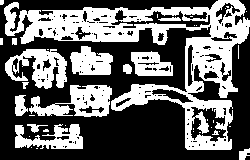

In [ ]:
print("Threshold image")
Image.fromarray(thresh)